# Instructions

1.Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

8. Plot a correlation matrix, comment what you see.

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

10. Comment what you can see in the plots.

11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [1]:
#1.Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
#3.First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#to see if we have null values
customer_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
#4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
#5.Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [8]:
#6.Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.
numericals_df = customer_df.select_dtypes(np.number)
numericals_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
#numericals_df['months_since_policy_inception'].unique()

In [10]:
#7.Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful.
#Store continuous data into a continuous_df variable and do the same for discrete_df

In [11]:
#this function categorizes columns in a DataFrame into continuous and discrite variables based on the number of unique values in each column.
#If the number of unique values in the coumn is greater than 100 the column is categorize as a continuous variable and if not, the columns is categorized as a discrete variable
def categorize_variables(dataframe):
    continuous = []
    discrete = []
    for column in dataframe.columns:
        if len(dataframe[column].unique()) > 100:
            continuous.append(column)
        else:
            discrete.append(column)
    return continuous, discrete

continuous_df, discrete_df = categorize_variables(numericals_df)

In [12]:
continuous_df

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

In [13]:
discrete_df

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

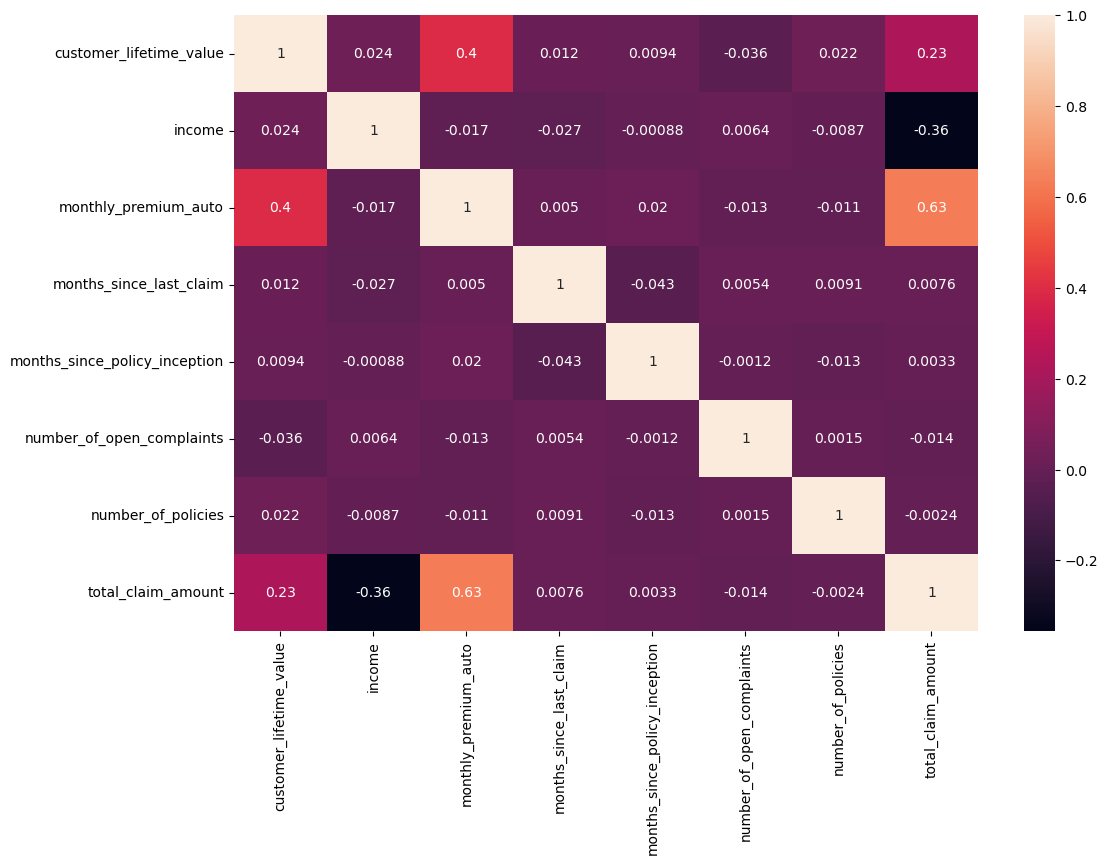

In [14]:
#8.Plot a correlation matrix, comment what you see.
correlation_matrix = numericals_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [15]:
#we don't have any high correlation (positive or negtive)

In [16]:
#9.Create a function to plot every discrete variable.
#Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

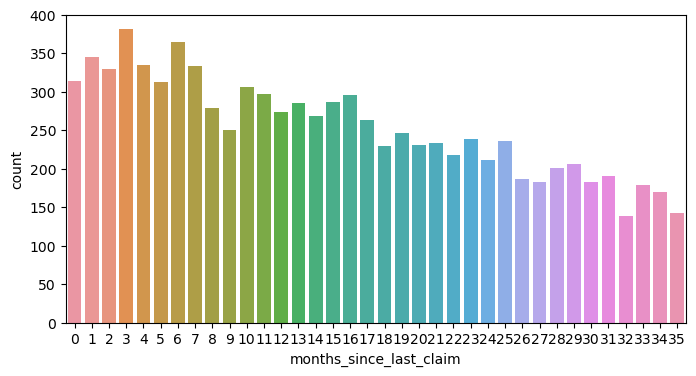

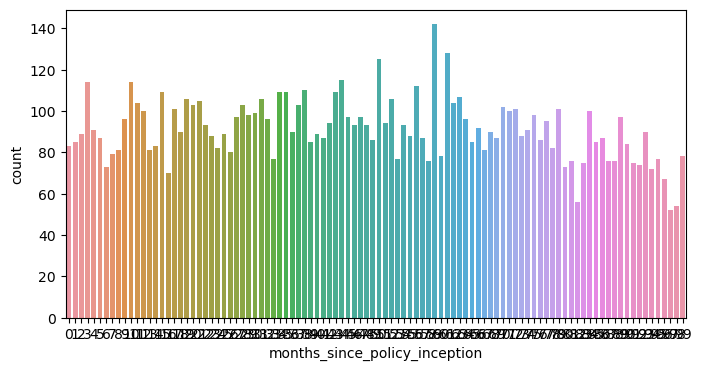

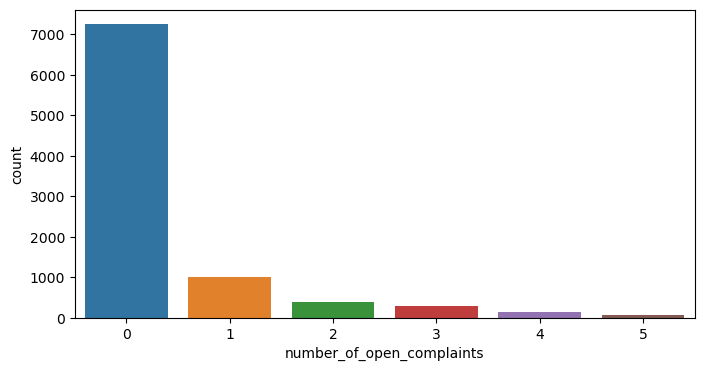

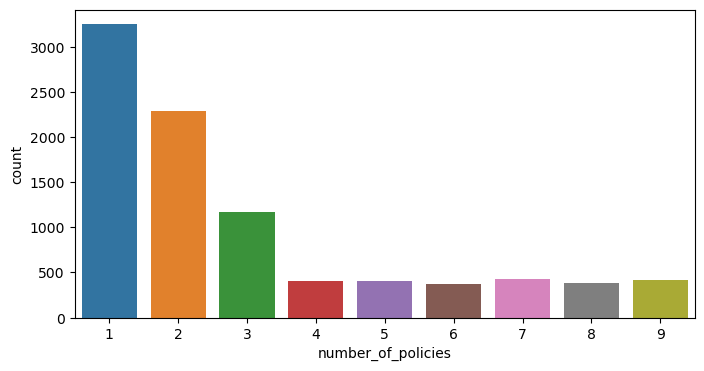

In [17]:
#Discrete variables
def plot_discrete_variables(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(x=column, data=dataframe)
        plt.show()
        
plot_discrete_variables(customer_df[discrete_df])

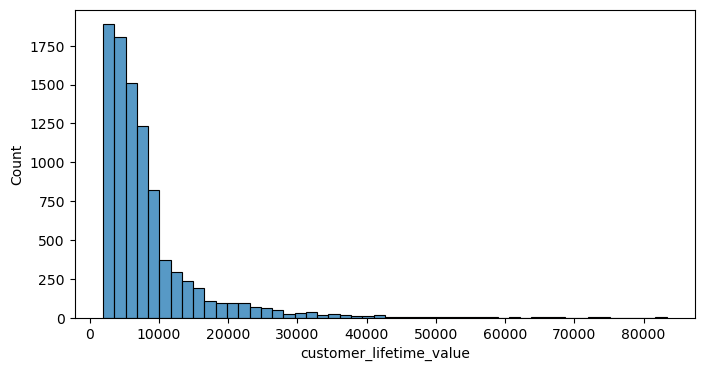

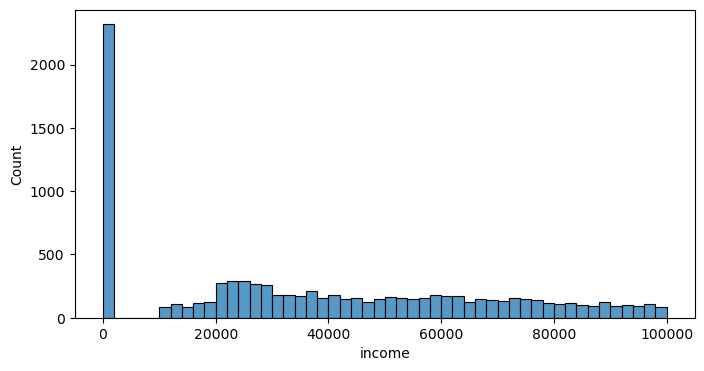

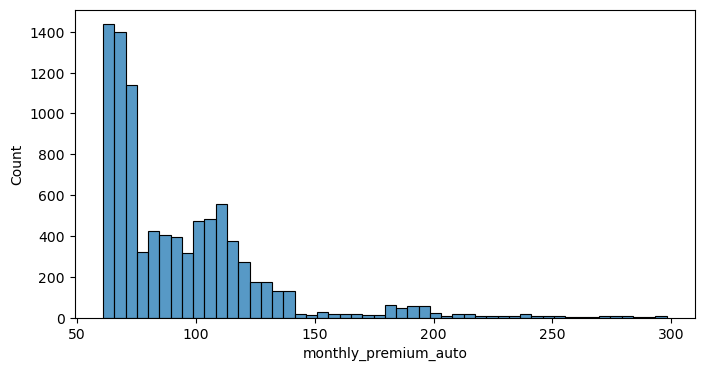

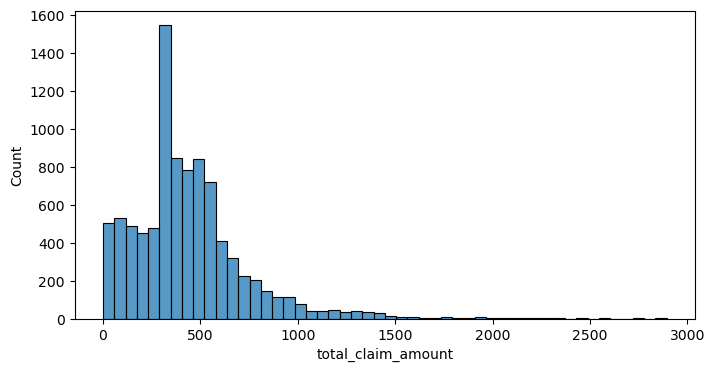

In [18]:
#Continues variables
def plot_continuous_variables(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(data=dataframe, x=column, bins=50)
        plt.show()
        
plot_continuous_variables(customer_df[continuous_df])

In [19]:
#10.Comment what you can see in the plots.
#In these plots we can see that we have many values concentrated on the left side

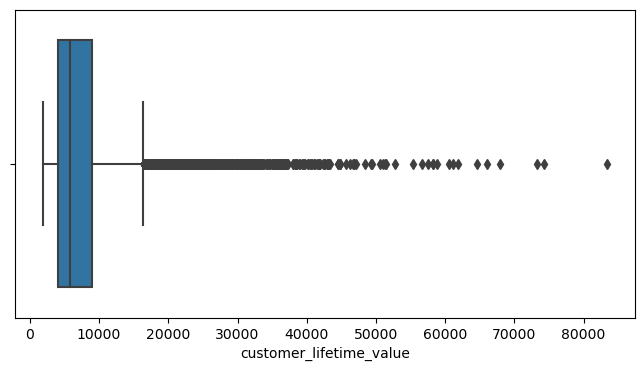

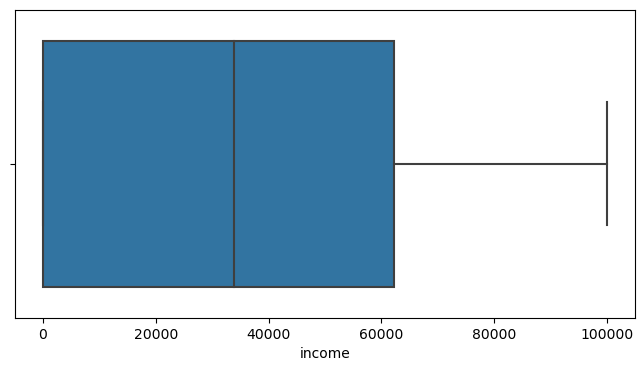

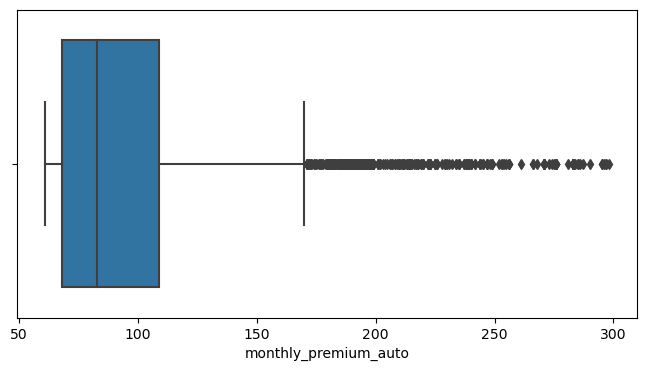

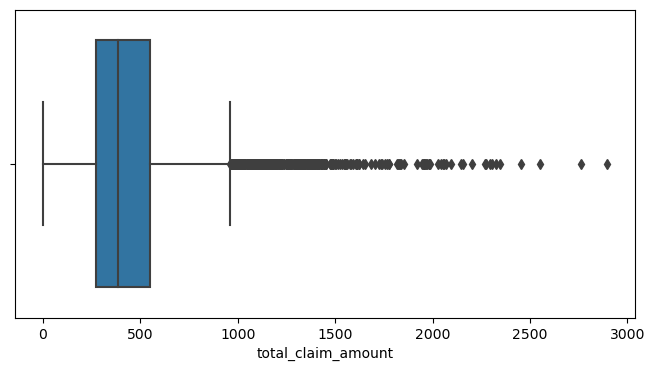

In [20]:
#11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
def plot_outliers(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=column, data=dataframe)
        plt.show()
        
plot_outliers(customer_df[continuous_df])

In [21]:
#12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.
#Also, remove them from your main dataframe.

In [22]:
iqr = np.nanpercentile(customer_df['customer_lifetime_value'],75) - np.nanpercentile(customer_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(customer_df['customer_lifetime_value'],75) + 1.5*iqr
print(iqr)
print(upper_limit)

extraordinary_points = customer_df[customer_df['customer_lifetime_value'] >200]
len(extraordinary_points)

4967.915247000001
16414.039911750002


9134

In [23]:
#I didnt find any outielrs. There are some values that are further away from the others in the total claim amount and in the customer lifetime value.
#total claim amoutn is our target so we don't change anything
#In the costumer lifetime value I will also not remove the outliers because there are many values that would be lost

In [24]:
customer_df['customer_lifetime_value'].value_counts(dropna=False)

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [25]:
#13.Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
missing_values = customer_df.isnull().sum()
missing_values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [26]:
#14.Save the numerical_df to csv as numerical.csv You will use this file again this week.
numericals_df.to_csv('numerical.csv', index=False)

# Instructions

1.Open the notebook created for Lab-cleaning-numerical-data.

2.Find all of the categorical data. Save it in a categorical_df variable.

3.Check for NaN values and decide what to do with them, do it now.

4.Check all unique values of columns.

5.Check dtypes. Do they all make sense as categorical data?

6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.

7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [27]:
#2.Find all of the categorical data. Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(include=['object'])
categorical_df 

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [28]:
#3.Check for NaN values and decide what to do with them, do it now.
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [29]:
#4.Check all unique values of columns.
for column in categorical_df.columns:
    print(f'Unique values for {column}: {categorical_df[column].unique()}')

Unique values for customer: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Unique values for state: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values for response: ['No' 'Yes']
Unique values for coverage: ['Basic' 'Extended' 'Premium']
Unique values for education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values for employmentstatus: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values for gender: ['F' 'M']
Unique values for location_code: ['Suburban' 'Rural' 'Urban']
Unique values for marital_status: ['Married' 'Single' 'Divorced']
Unique values for policy_type: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique values for policy: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values for renew_offer_type: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Unique values for sales_channel: ['Agent' 'Call Center' 'We

In [30]:
#5.Check dtypes. Do they all make sense as categorical data?
#yes, I think they do

In [31]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [32]:
#6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.

#Clean the renew_offer_type column: we just want the number
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('Offer', '', regex=True)
#Clean the policy column: we just want the number
categorical_df['policy'] = categorical_df['policy'].str.extract('(\d+)')

In [33]:
categorical_df 

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


In [34]:
#7.Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
#we can combine some categories of cars, which basically mean the same
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].replace(['Luxury SUV', 'Sports Car', 'Luxury Car'], 'Luxury Car')
categorical_df ['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury Car'], dtype=object)

In [35]:
#8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
policy_type_count = categorical_df['policy_type'].value_counts()
print(policy_type_count)

policy_counts = categorical_df['policy'].value_counts()
print(policy_counts)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
3    4588
2    2881
1    1665
Name: policy, dtype: int64


In [36]:
policy_types = categorical_df['policy_type'].unique()
for policy_type in policy_types:
    print(f'Policy Type: {policy_type}')
    policy_type_subset = categorical_df[categorical_df['policy_type'] == policy_type]
    policy_counts = policy_type_subset['policy'].value_counts()
    print(policy_counts)
    print('\n')

Policy Type: Corporate Auto
3    1014
2     595
1     359
Name: policy, dtype: int64


Policy Type: Personal Auto
3    3426
2    2122
1    1240
Name: policy, dtype: int64


Policy Type: Special Auto
2    164
3    148
1     66
Name: policy, dtype: int64




In [37]:
#The 'policy_type' represents broader categories of auto insurance policies, while 'policy' provides more specific information about the individual policies within each category
# I kept the policy_type column and just left the number in the policy column to make it easier to read the data

In [38]:
#10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
categorical_df.to_csv('categorical.csv', index=False)